# Problem 1. First passage on a semi-infinite line

## 1.1-3

![Handwritten solution. Contact me if unavailable](1.1-3.1.jpg)

![Handwritten solution. Contact me if unavailable](1.1-3.2.jpg)

## 1.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from tqdm import tqdm

In [2]:
x0, D = 1, 1
dt = .01
T = 10
nruns = 1000

timespace = np.arange(0, T, dt)
S = np.zeros_like(timespace)

In [3]:
for _ in tqdm(range(nruns)):
    x = x0
    i = 0
    t = 0.
    while x > 0 and t < T:
        x = x + np.sqrt(2 * dt) * np.random.randn()
        i += 1
        t += dt
    
    # S[abs(timespace - t) <= dt] += 1
    S[:i] += 1
S /= nruns

100%|██████████| 1000/1000 [00:01<00:00, 951.99it/s]


In [4]:
S_an = lambda t: erf(x0 / np.sqrt(4 * D * t))

C:\Users\kuzne\AppData\Local\Temp\ipykernel_3456\3148160381.py:1: RuntimeWarning: divide by zero encountered in divide
  S_an = lambda t: erf(x0 / np.sqrt(4 * D * t))


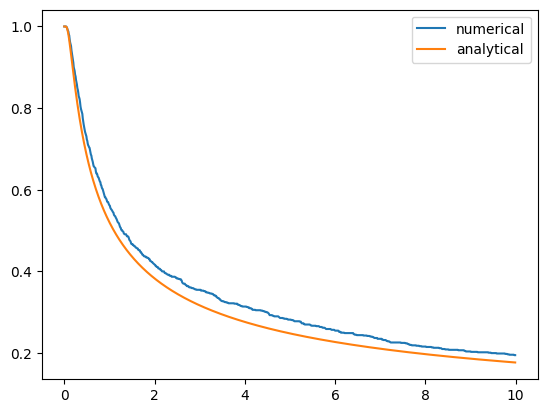

In [5]:
plt.plot(timespace, S, label='numerical')
plt.plot(timespace, S_an(timespace), label='analytical')
plt.legend();

# Problem 2. Active Brownian motion in two dimensions

## 2.1

![Handwritten solution. Contact me if unavailable](2.1.1.jpg)

![Handwritten solution. Contact me if unavailable](2.1.2.jpg)

## 2.2

Assuming $\theta_0 = 0$, so in all formulas $\mathrm{cos} \theta_0 = 1$ and $\mathrm{sin} \theta_0 = 0$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
nruns = 1000
T = 10.
dt = 1.
D_R = 1.
v0 = 1.

In [8]:
t = np.arange(0, T, dt)
x = np.zeros((nruns, len(t)))
y = np.zeros((nruns, len(t)))
theta = np.zeros((nruns, len(t)))

for i in range(1, len(t)):
    theta[:, i] = theta[:, i - 1] + np.sqrt(2 * 2 * D_R * dt) * np.random.randn(nruns)
    x[:, i] = x[:, i - 1] + v0 * np.cos(theta[:, i - 1])
    y[:, i] = y[:, i - 1] + v0 * np.sin(theta[:, i - 1])

x_avg = x.mean(axis=0)
y_avg = y.mean(axis=0)
x2_avg = (x**2).mean(axis=0)
y2_avg = (y**2).mean(axis=0)

In [9]:
x_avg_an = lambda t: v0 / D_R * (1 - np.exp(-D_R * t))
y_avg_an = lambda t: np.zeros_like(t)
x2_avg_an = lambda t: v0**2 * t / D_R + v0**2 / 12 / D_R**2 * (np.exp(-4 * D_R * t) + 8 * np.exp(-D_R * t) - 9)
y2_avg_an = lambda t: v0**2 * t / D_R - v0**2 / 12 / D_R**2 * (np.exp(-4 * D_R * t) - 16 * np.exp(-D_R * t) + 15)

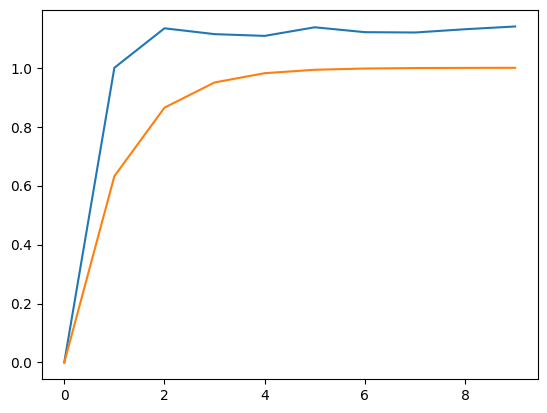

In [10]:
plt.plot(x_avg)
plt.plot(x_avg_an(t))

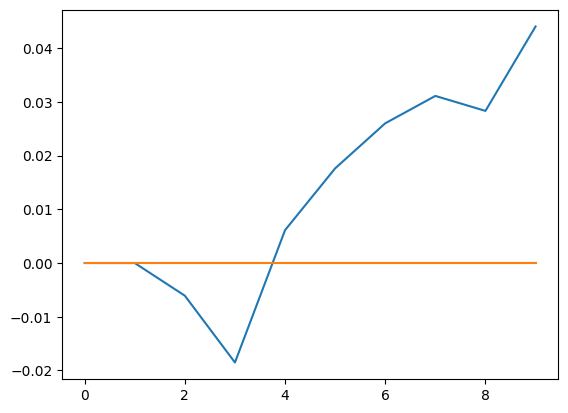

In [11]:
plt.plot(y_avg)
plt.plot(y_avg_an(t))

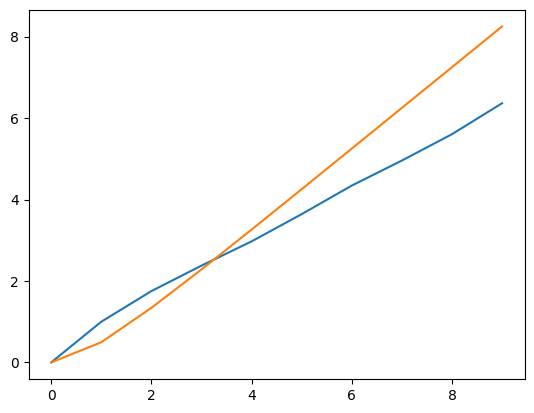

In [12]:
plt.plot(x2_avg)
plt.plot(x2_avg_an(t))

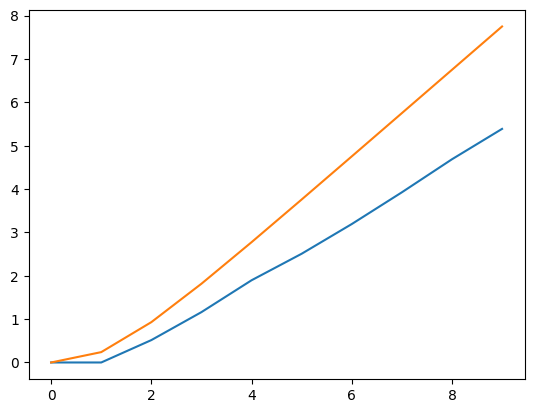

In [13]:
plt.plot(y2_avg)
plt.plot(y2_avg_an(t))

## 2.3

![Handwritten solution. Contact me if unavailable](2.3.1.jpg)

![Handwritten solution. Contact me if unavailable](2.3.2.jpg)

# Problem 3. Fractional derivatives

## 3.1

![Handwritten solution. Contact me if unavailable](3.1.jpg)

In [14]:
import numpy as np
from scipy.special import gamma, expn
import matplotlib.pyplot as plt

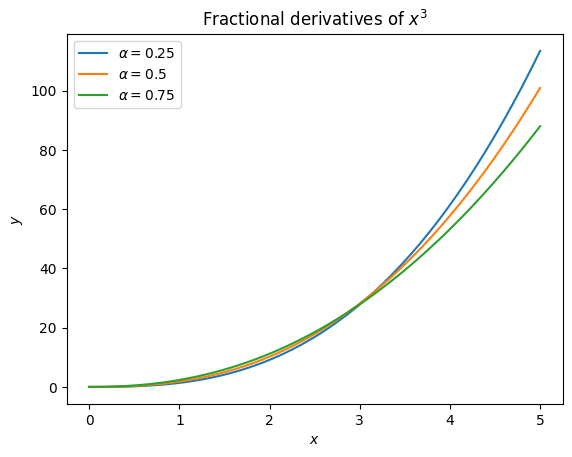

In [15]:
x = np.linspace(0, 5)
y_025 = 6 / gamma(15 / 4) * x**(11 / 4)
y_05 = 16 / 5 / np.sqrt(np.pi) * x**(5 / 2)
y_075 = 6 / gamma(13 / 4) * x**(9 / 4)

plt.plot(x, y_025, label=r'$\alpha=0.25$')
plt.plot(x, y_05, label=r'$\alpha=0.5$')
plt.plot(x, y_075, label=r'$\alpha=0.75$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Fractional derivatives of $x^3$')
plt.legend();

## 3.2

![Handwritten solution. Contact me if unavailable](3.2.jpg)

In [16]:
def inc_gamma(a, z):
    # Relation from Wiki
    return z**a * expn(1 - a, z)

C:\Users\kuzne\AppData\Local\Temp\ipykernel_3456\3594300626.py:3: RuntimeWarning: divide by zero encountered in power
  return z**a * expn(1 - a, z)
C:\Users\kuzne\AppData\Local\Temp\ipykernel_3456\3594300626.py:3: RuntimeWarning: floating point number truncated to an integer
  return z**a * expn(1 - a, z)


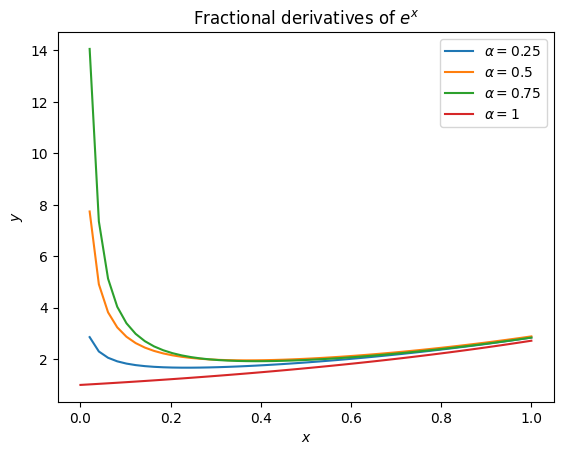

In [17]:
x = np.linspace(0, 1)
y_025 = np.exp(x) * (1 - inc_gamma(-1 / 4, x) / gamma(-1 / 4))
y_05 = np.exp(x) * (1 - inc_gamma(-1 / 2, x) / gamma(-1 / 2))
y_075 = np.exp(x) * (1 - inc_gamma(-3 / 4, x) / gamma(-3 / 4))
y_1 = np.exp(x)

plt.plot(x, y_025, label=r'$\alpha=0.25$')
plt.plot(x, y_05, label=r'$\alpha=0.5$')
plt.plot(x, y_075, label=r'$\alpha=0.75$')
plt.plot(x, y_1, label=r'$\alpha=1$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Fractional derivatives of $e^x$')
plt.legend();